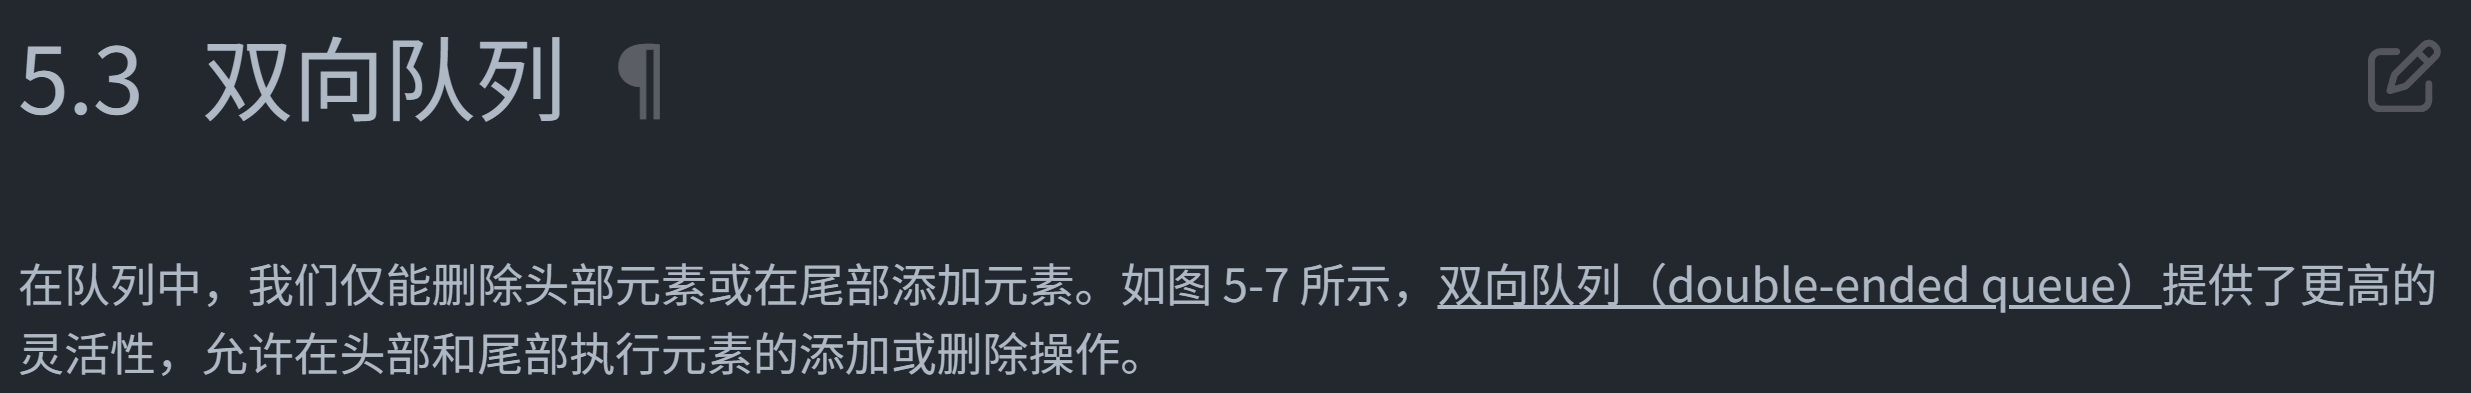

In [1]:
from collections import deque

# initialize
deq: deque[int] = deque()

# push
deq.append(2)
deq.append(5)
deq.append(4)
deq.appendleft(3)  # 添加至队首
deq.appendleft(1)

# visit
front: int = deq[0]  # 队首元素
rear: int = deq[-1]  # 队尾元素

# pop
pop_front = deq.popleft()
pop_rear: int = deq.pop()       # 队尾元素出队

# length
size: int = len(deq)

# empty
is_empty: bool = len(deq) == 0

"""Driver Code"""
if __name__ == "__main__":
    # 初始化双向队列
    deq = deque()

    # 元素入队
    deq.append(2)  # 添加至队尾
    deq.append(5)
    deq.append(4)
    deq.appendleft(3)  # 添加至队首
    deq.appendleft(1)
    print("双向队列 deque =", deq)

    # 访问元素
    front = deq[0]  # 队首元素
    print("队首元素 front =", front)
    rear = deq[-1]  # 队尾元素
    print("队尾元素 rear =", rear)

    # 元素出队
    pop_front = deq.popleft()  # 队首元素出队
    print("队首出队元素  pop_front =", pop_front)
    print("队首出队后 deque =", deq)
    pop_rear = deq.pop()  # 队尾元素出队
    print("队尾出队元素  pop_rear =", pop_rear)
    print("队尾出队后 deque =", deq)

    # 获取双向队列的长度
    size = len(deq)
    print("双向队列长度 size =", size)

    # 判断双向队列是否为空
    is_empty = len(deq) == 0
    print("双向队列是否为空 =", is_empty)

双向队列 deque = deque([1, 3, 2, 5, 4])
队首元素 front = 1
队尾元素 rear = 4
队首出队元素  pop_front = 1
队首出队后 deque = deque([3, 2, 5, 4])
队尾出队元素  pop_rear = 4
队尾出队后 deque = deque([3, 2, 5])
双向队列长度 size = 3
双向队列是否为空 = False


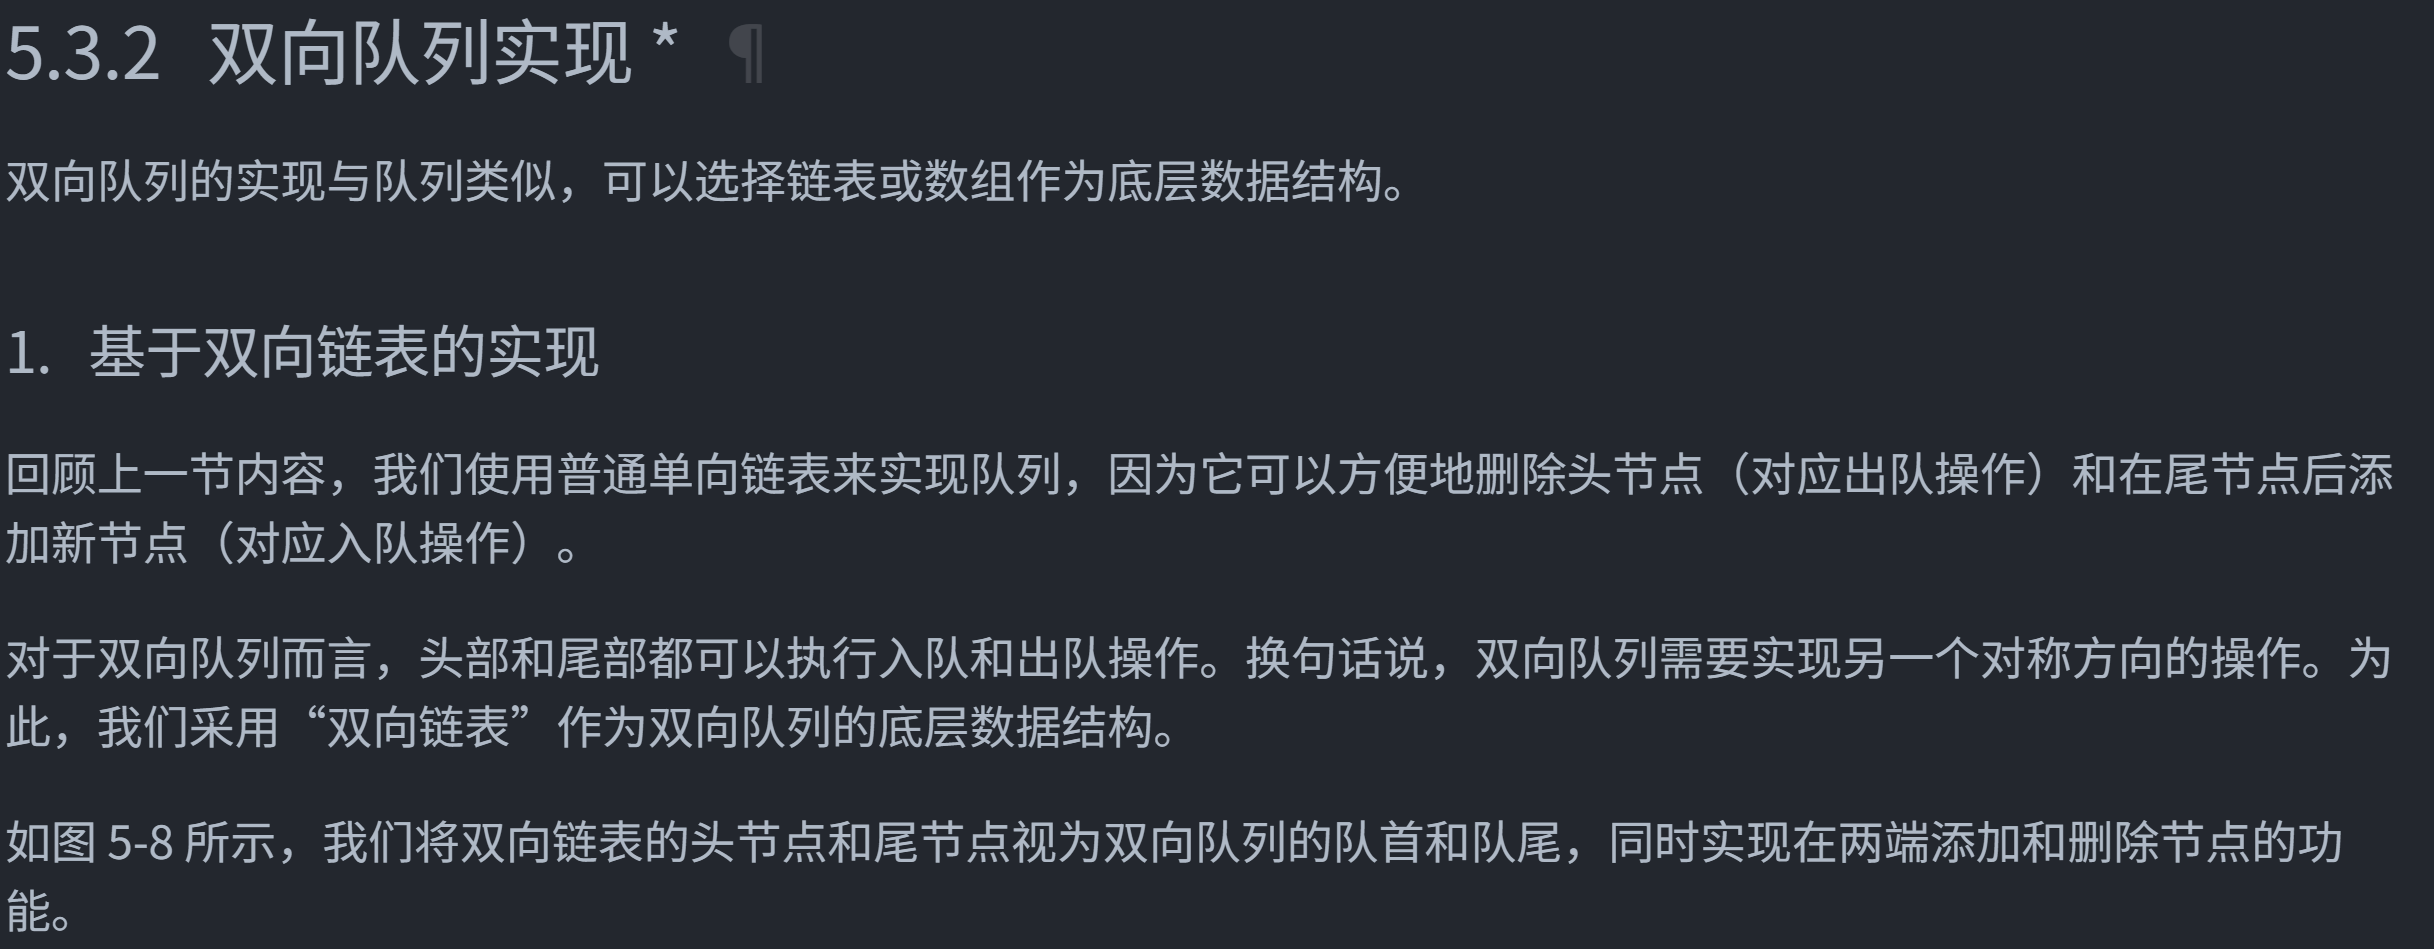

In [2]:
class ListNode:
    def __init__(self, val) -> None:
        self.val = val
        self.next: ListNode | None = None
        self.prev: ListNode | None = None

class LinkedListDeque:
    def __init__(self) -> None:
        self._front: ListNode | None  = None
        self._rear: ListNode | None  = None
        self._size: int = 0
    
    def size(self) -> int:
        return self._size
    
    def is_empty(self) -> bool:
        return self._size == 0
    
    def push(self, num: int, is_front: bool):
        node = ListNode(num)
        if self.is_empty():
            self._front = self._rear = node
        elif is_front:
            self._front.prev = node
            node.next = self._front
            self._front = node
        else:
            self._rear.next = node
            node.prev = self._rear
            self._rear = node
        self._size += 1
    
    def push_first(self, num: int):
        self.push(num, True)
    
    def push_last(self, num: int):
        self.push(num, False)
        
    def pop(self, is_front: bool) -> int:
        if self.is_empty():
            raise IndexError("Empty!")
        if is_front:
            val: int = self._front.val
            # delete front
            fnext: ListNode | None = self._front.next
            if fnext != None:
                fnext.prev = None
                self._front.next = None
            self._front = fnext
        else:
            val: int = self._rear.val
            rear: ListNode | None = self._rear.prev
            if rear != None:
                rear.next = None
                self._rear.prev = None
            self._rear = rear
        self._size -= 1
        return val

    def pop_first(self):
        return self.pop(True)
    
    def pop_last(self):
        return self.pop(False)
    
    def peek_fist(self) -> int:
        if self.is_empty():
            raise IndexError("empty")
        return self._front.val
    
    def peek_last(self) -> int:
        if self.is_empty():
            raise IndexError("empty")
        return self._rear.val
    
    def to_array(self) -> list[int]:
        node = ListNode()
        node = self._front
        res = [0] * self._size
        i = 0
        while node:
            res[i] = node.val
            node = node.next
            i += 1
        return res

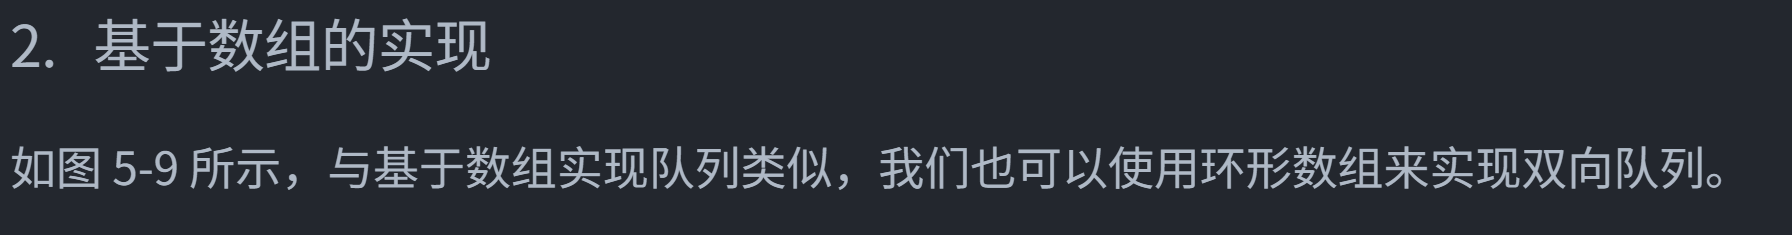

In [ ]:
class ArrayDeqeue:
    """基于环形数组实现的队列"""
    def __init__(self, size: int) -> None:
        """构造方法"""
        self._nums: list[int] = [0] * size 
        self._front: int = 0
        self._size: int = 0
    
    def capacity(self) -> int:
        return len(self._nums)
    
    def size(self) -> int:
        return self._size
    
    def is_empty(self) -> int:
        return self._size == 0
    
    def index(self, i: int) -> int:
        """计算环形数组索引"""
        # 通过取余操作实现数组首尾相连
        # 当 i 越过数组尾部后，回到头部
        # 当 i 越过数组头部后，回到尾部
        return (i + self.capacity()) % self.capacity()
    
    def push_first(self, num: int):
        if self._size == self.capacity():
            raise IndexError("队列已满")
        self._front = self.index(self._front - 1)
        self._nums[self._front] = num
        self._size += 1
    
    def push_last(self, num: int):
        if self._size == self.capacity():
            raise IndexError('man')
        rear = self.index(self._front + self._size)
        self._nums[rear] = num
        self._size += 1
        
    def peek_first(self) -> int:
        """访问队首元素"""
        if self.is_empty():
            raise IndexError("双向队列为空")
        return self._nums[self._front]

    def peek_last(self) -> int:
        """访问队尾元素"""
        if self.is_empty():
            raise IndexError("双向队列为空")
        # 计算尾元素索引
        last = self.index(self._front + self._size - 1)
        return self._nums[last]
    
    def pop_first(self) -> int:
        num: int = self.peek_first()
        self._front = self.index(self._front + 1)
        self._size -= 1
        return num

    def pop_last(self) -> int:
        num: int = self.peek_last()
        self._size -= 1
        return num
    
    def peek(self) -> int:
        if self.is_empty():
            raise IndexError("Queue is empty!")
        return self._nums[self._front]
    
    def to_array(self) -> list[int]:
        res = []
        for i in range(self._size):
            res.append(self._nums[self.index(self._front + i)])
        return res

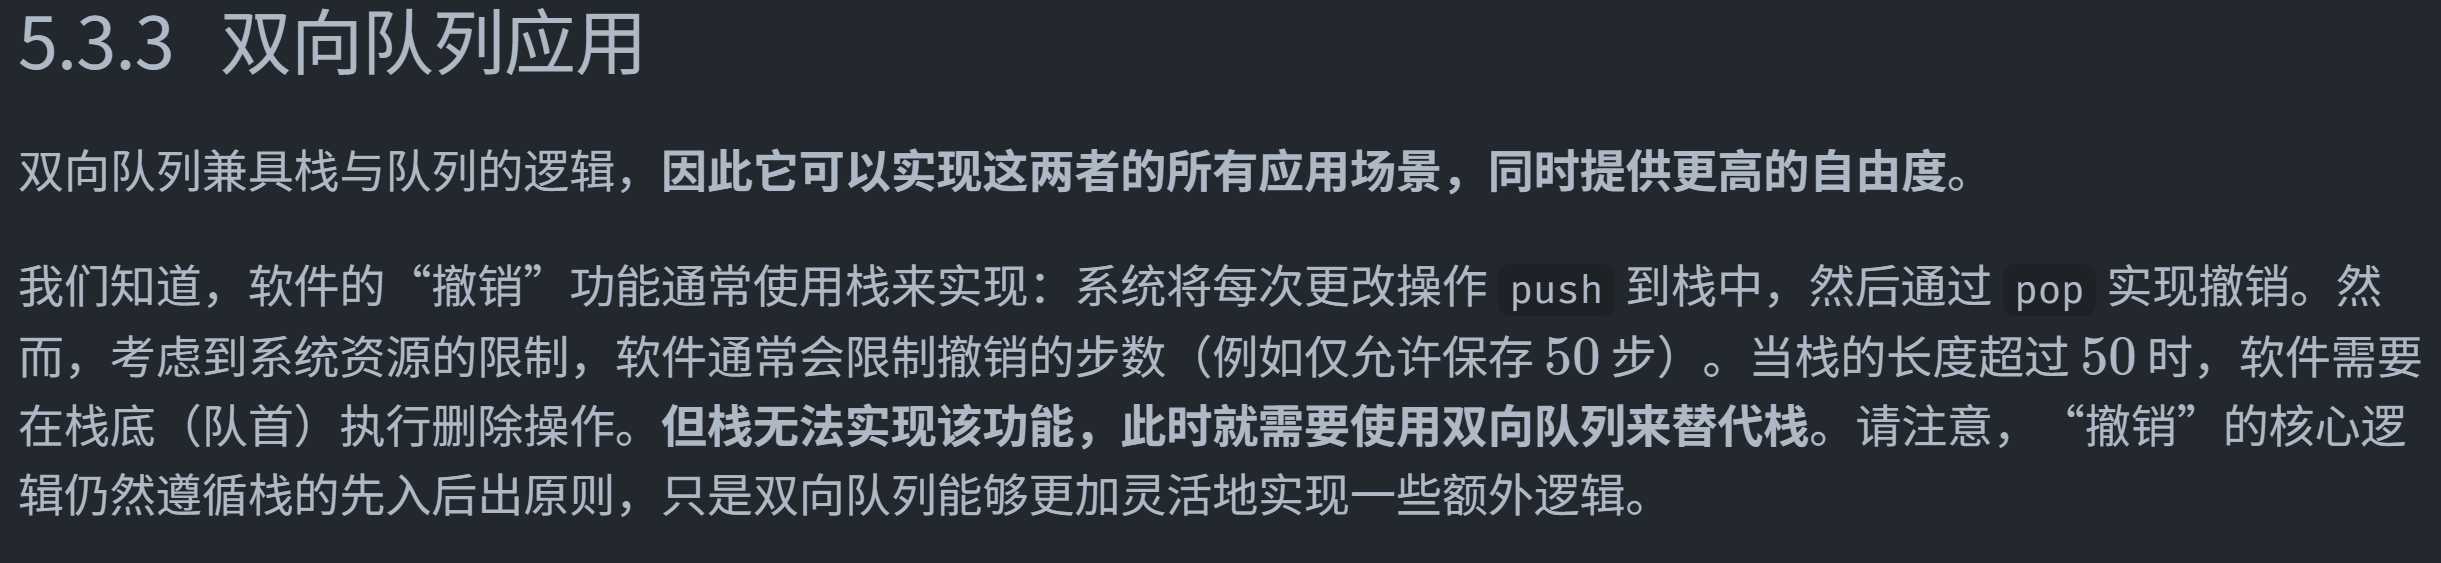